In [25]:
# https://www.satmapper.hu/en/rgb-images/
import matplotlib.pyplot as plt
import numpy as np
import rasterio
import os
from osgeo import gdal
from pathlib import Path
from PIL import Image

In [59]:
def load_sentinel_image(img_folder, bands):
    image = {}
    path = Path(img_folder)
    for band in bands:
        # considering the sentinel images end with *_B#_10m.jp2, we will use it to locate the correct file
        file = next(path.glob(f'*_{band}_10m.jp2'))
        print(f'Opening file {file}')
        tifFile = jp2ToTiff(f'{file}')
        ds = rasterio.open( f'{tifFile}', driver='GTiff')
        image.update({band: ds})
    return image

In [60]:
def jp2ToTiff(fileName):
    in_image = gdal.Open(fileName)
    driver = gdal.GetDriverByName("GTiff")
    fp_tif = fileName[:-4]+'.tif'
    print(f'Saving to file {fp_tif}')
    out_image = driver.CreateCopy(fp_tif, in_image, 0)
    in_image = None
    out_image = None  
    return fp_tif

In [71]:
def normalize(band):
    band_min, band_max = (band.min(), band.max())
    return ((band-band_min)/((band_max - band_min)))  # .astype( np.float16 )

In [62]:
# blue  = B02
# green = B03
# red   = B04
pathOne = '/home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/'
img = load_sentinel_image(pathOne, ['B02','B03','B04'])

Opening file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B02_10m.jp2
Saving to file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B02_10m.tif
Opening file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B03_10m.jp2
Saving to file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B03_10m.tif
Opening file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B04_10m.jp2
Saving to file /home/data/28993b79-d5dc-48b1-8c61-3d31eafd0b88/T19NDE_20220127T150719_B04_10m.tif


In [63]:
blue  = img['B02'].read(1);
green = img['B03'].read(1);
red = img['B04'].read(1);

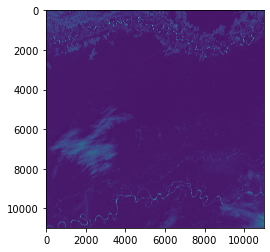

In [64]:
plt.imshow( red )

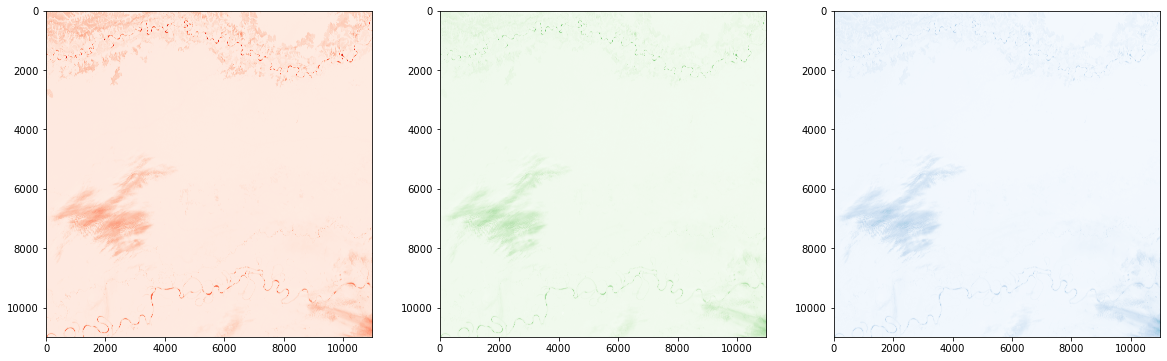

In [65]:
fig = plt.figure(figsize=(20,6))
ax1 = fig.add_subplot(1,3,1)
ax1.imshow(red, cmap='Reds')
ax1 = fig.add_subplot(1,3,2)
ax1.imshow(green, cmap='Greens')
ax1 = fig.add_subplot(1,3,3)
ax1.imshow(blue, cmap='Blues')

In [66]:
rgb_composite_raw= np.dstack((red, green, blue))
rgb_composite_raw.shape

(10980, 10980, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


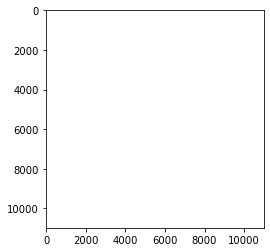

In [67]:
plt.imshow(rgb_composite_raw)

In [72]:
red_n = normalize(red)
green_n = normalize(green)
blue_n = normalize(blue)

MemoryError: Unable to allocate 920. MiB for an array with shape (10980, 10980) and data type float64

In [69]:
red_n.max()

1.0

In [70]:
rgb_composite_n= np.dstack((red_n, green_n, blue_n))
plt.imshow(rgb_composite_n)

ValueError: Unsupported dtype

<Figure size 432x288 with 1 Axes>